In [22]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

KOI_raw_data = pd.read_csv('Data/KOI_data_cumulative_2025.09.22_07.28.01.csv',skiprows=144)
TOI_raw_data = pd.read_csv('Data/TOI_data_2025.09.22_07.28.57.csv', skiprows=90)
K2_raw_data = pd.read_csv('Data/K2_data_k2pandc_2025.09.22_07.31.46.csv',skiprows=298)

In [7]:
useless_columns_KOI = [
    'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt',
    'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_disp_prov', 'koi_parm_prov', 'koi_sparprov',
    'koi_vet_stat', 'koi_vet_date', 'koi_comment', 'koi_tce_delivname', 'koi_tce_plnt_num', 'ra', 'dec',
    'koi_quarters', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_time0', 'koi_time0_err1',
    'koi_time0_err2', 'koi_limbdark_mod', 'koi_fittype', 'koi_dicco_mra', 'koi_dicco_mra_err', 'koi_dicco_mdec',
    'koi_dicco_mdec_err', 'koi_dicco_msky', 'koi_dicco_msky_err', 'koi_dikco_mra', 'koi_dikco_mra_err',
    'koi_dikco_mdec', 'koi_dikco_mdec_err', 'koi_dikco_msky', 'koi_dikco_msky_err', 'koi_fwm_stat_sig', 'koi_fwm_sra',
    'koi_fwm_sra_err', 'koi_fwm_sdec', 'koi_fwm_sdec_err', 'koi_fwm_srao', 'koi_fwm_srao_err', 'koi_fwm_sdeco',
    'koi_fwm_sdeco_err', 'koi_fwm_prao', 'koi_fwm_prao_err', 'koi_fwm_pdeco', 'koi_fwm_pdeco_err', 'koi_period_err1',
    'koi_period_err2', 'koi_eccen_err1', 'koi_eccen_err2', 'koi_longp_err1', 'koi_longp_err2', 'koi_impact_err1',
    'koi_impact_err2', 'koi_duration_err1', 'koi_duration_err2', 'koi_ingress_err1', 'koi_ingress_err2',
    'koi_depth_err1', 'koi_depth_err2', 'koi_ror_err1', 'koi_ror_err2', 'koi_srho_err1', 'koi_srho_err2',
    'koi_prad_err1', 'koi_prad_err2', 'koi_sma_err1', 'koi_sma_err2', 'koi_incl_err1', 'koi_incl_err2', 'koi_teq_err1',
    'koi_teq_err2', 'koi_insol_err1', 'koi_insol_err2', 'koi_dor_err1', 'koi_dor_err2', 'koi_steff_err1',
    'koi_steff_err2', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_smet_err1', 'koi_smet_err2', 'koi_srad_err1',
    'koi_srad_err2', 'koi_smass_err1', 'koi_smass_err2', 'koi_sage_err1', 'koi_sage_err2',
]
useless_columns_TOI = ['toi','raerr1','raerr2','decerr1','decerr2','st_pmralim','st_pmrasymerr','st_pmdeclim','st_pmdecsymerr','pl_tranmidlim','pl_tranmidsymerr','pl_orbperlim','pl_orbpersymerr','pl_trandurhlim','pl_trandurhsymerr','pl_trandeplim','pl_trandepsymerr','pl_radelim','pl_radesymerr','pl_insolerr1','pl_insolerr2',
                   'pl_insollim','pl_insolsymerr','pl_eqterr1','pl_eqterr2','pl_eqtlim','pl_eqtsymerr','st_tmaglim','st_tmagsymerr', 'st_distlim','st_distsymerr','st_tefflim','st_teffsymerr','st_logglim','st_loggsymerr','st_radlim','st_radsymerr','toi_created','rowupdate','rowid','pl_pnum','st_pmraerr2','st_pmdecerr2',
                   'pl_tranmiderr2','pl_orbpererr2','pl_trandurherr2','pl_trandeperr2','pl_radeerr2','st_tmagerr2','st_disterr2','st_tefferr2','st_loggerr2','st_raderr2','rastr','decstr']

useless_columns_K2 = ['disp_refname','discoverymethod','disc_year','disc_refname','disc_pubdate','disc_locale','disc_facility','disc_telescope','disc_instrument','pul_flag','ptv_flag','tran_flag','ast_flag','obm_flag','micro_flag','etv_flag','ima_flag','dkin_flag','soltype','pl_controv_flag','pl_refname','pl_orbperlim','pl_orbsmax',
                      'pl_orbsmaxerr1','pl_orbsmaxerr2','pl_orbsmaxlim','pl_radelim','pl_radjlim','pl_masse','pl_masseerr1','pl_masseerr2','pl_masselim','pl_massj','pl_massjerr1','pl_massjerr2','pl_massjlim','pl_msinie','pl_msinieerr1','pl_msinieerr2','pl_msinielim','pl_msinij','pl_msinijerr1','pl_msinijerr2','pl_msinijlim',
                      'pl_cmasse','pl_cmasseerr1','pl_cmasseerr2','pl_cmasselim','pl_cmassj','pl_cmassjerr1','pl_cmassjerr2','pl_cmassjlim','pl_bmasse','pl_bmasse','pl_bmasseerr1','pl_bmasseerr2','pl_bmasselim','pl_bmassj','pl_bmassjerr1','pl_bmassjerr2','pl_bmassjlim','pl_bmassprov','pl_dens','pl_denserr1','pl_denserr2','pl_denslim',
                      'pl_orbeccen','pl_orbeccenerr1','pl_orbeccenerr2','pl_orbeccenlim','pl_insol','pl_insolerr1','pl_insolerr2','pl_insollim','pl_eqt','pl_eqterr1','pl_eqterr2','pl_eqtlim','pl_orbincl','pl_orbinclerr1','pl_orbinclerr2','pl_orbincllim','pl_tranmidlim','pl_tsystemref','ttv_flag','pl_imppar','pl_impparerr1',
                      'pl_impparerr2','pl_impparlim','pl_trandep','pl_trandeperr1','pl_trandeperr2','pl_trandeplim','pl_trandurerr1','pl_trandurerr2','pl_trandurlim','pl_ratdor','pl_ratdorerr1','pl_ratdorerr2','pl_ratdorlim','pl_ratrorerr1','pl_ratrorerr2','pl_ratrorlim','pl_occdep','pl_occdeperr1','pl_occdeperr2','pl_occdeplim',
                      'pl_orbtper','pl_orbtpererr1','pl_orbtpererr2','pl_orbtperlim','pl_orblper','pl_orblpererr1','pl_orblpererr2','pl_orblperlim','pl_rvamp','pl_rvamperr1','pl_rvamperr2','pl_rvamplim','pl_projobliq','pl_projobliqerr1','pl_projobliqerr2','pl_projobliqlim','pl_trueobliq','pl_trueobliqerr1','pl_trueobliqerr2',
                      'pl_trueobliqlim','st_refname','st_spectype','st_tefferr1','st_tefferr2','st_tefflim','st_radlim','st_mass','st_masserr1','st_masserr2','st_masslim','st_met','st_meterr1','st_meterr2','st_metlim','st_metratio','st_lum','st_lumerr1','st_lumerr2','st_lumlim','st_loggerr1','st_loggerr2','st_logglim','st_age',
                      'st_ageerr1','st_ageerr2','st_agelim','st_dens','st_denserr1','st_denserr2','st_denslim','st_vsin','st_vsinerr1','st_vsinerr2','st_vsinlim','st_rotp','st_rotperr1','st_rotperr2','st_rotplim','st_radv','st_radverr1','st_radverr2','st_radvlim','sy_refname','sy_pmerr2','sy_pmraerr2','sy_pmdecerr2','sy_disterr2',
                      'sy_plxerr2','sy_bmagerr2','sy_vmagerr2','sy_jmagerr2','sy_hmagerr2','sy_kmagerr2','sy_umag','sy_umagerr1','sy_umagerr2','sy_gmag','sy_gmagerr1','sy_gmagerr2','sy_rmag','sy_rmagerr1','sy_rmagerr2','sy_imag','sy_imagerr1','sy_imagerr2','sy_zmag','sy_zmagerr1','sy_zmagerr2','sy_w1magerr2','sy_w2magerr2',
                      'sy_w3magerr2','sy_w4magerr1','sy_w4magerr2','sy_gaiamagerr2','sy_icmag','sy_icmagerr1','sy_icmagerr2','sy_tmagerr2','sy_kepmagerr1','sy_kepmagerr2','rowupdate','pl_pubdate','releasedate','pl_nnotes','k2_campaigns','k2_campaigns_num','st_nphot','st_nrvc','st_nspec','pl_nespec','pl_ntranspec','pl_ndispec']


In [8]:
df_KOI = KOI_raw_data.drop(columns=useless_columns_KOI)
df_TOI = TOI_raw_data.drop(columns=useless_columns_TOI)
df_K2 = K2_raw_data.drop(columns=useless_columns_K2)

In [23]:
original_columns = df_TOI.columns
df_TOI_encoded = pd.get_dummies(df_TOI, columns=['tfopwg_disp'], dummy_na=False, prefix='state')
df_TOI_encoded

,toipfx,tid,ctoi_alias,ra,dec,st_pmra,st_pmraerr1,st_pmdec,st_pmdecerr1,pl_tranmid,...,st_logg,st_loggerr1,st_rad,st_raderr1,state_APC,state_CP,state_FA,state_FP,state_KP,state_PC
0,1000,50365310,5.036531e+07,112.357708,-12.695960,-5.964,0.085,-0.076,0.072,2.459230e+06,...,4.19,0.07,2.169860,0.072573,False,False,False,True,False,False
1,1001,88863718,8.886372e+07,122.580465,-5.513852,-4.956,0.102,-15.555,0.072,2.459988e+06,...,4.03,0.09,2.010000,0.090000,False,False,False,False,False,True
2,1002,124709665,1.247097e+08,104.726966,-10.580455,-1.462,0.206,-2.249,0.206,2.459225e+06,...,NaN,NaN,5.730000,NaN,False,False,False,True,False,False
3,1003,106997505,1.069975e+08,110.559945,-25.207017,-0.939,0.041,1.640,0.055,2.458493e+06,...,4.15,1.64,NaN,NaN,False,False,False,True,False,False
4,1004,238597883,2.385979e+08,122.178195,-48.802811,-4.496,0.069,9.347,0.062,2.459987e+06,...,4.14,0.07,2.150000,0.060000,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,995,317951248,3.179512e+08,110.811443,5.562850,2.061,0.405,-7.082,0.336,2.458494e+06,...,NaN,NaN,NaN,NaN,False,False,False,True,False,False
7664,996,142918609,1.429186e+08,119.349948,-19.516015,-3.900,0.848,3.866,1.158,2.458495e+06,...,NaN,NaN,2.050000,NaN,False,False,False,True,False,False
7665,997,341729521,3.417295e+08,121.319521,-59.579798,-44.770,0.044,-2.616,0.036,2.459230e+06,...,4.52,0.08,0.926261,0.045789,False,False,False,True,False,False
7666,998,54390047,5.439005e+07,118.319555,-14.218823,-1.706,0.069,-1.714,0.061,2.459230e+06,...,4.01,0.07,2.349860,0.091578,False,False,False,True,False,False


In [25]:
imputer = IterativeImputer(max_iter=10, random_state=0)
df_TOI_imputado = pd.DataFrame(imputer.fit_transform(df_TOI_encoded), columns=df_TOI_encoded.columns)
print(df_TOI_imputado)

encoded_columns = [col for col in df_TOI_imputado.columns if col.startswith('state_')]

columnas_originales = [col for col in df_TOI_imputado.columns if col not in encoded_columns]

decoded_series = df_TOI_imputado[encoded_columns].idxmax(axis=1)

df_TOI['tfopwg_disp_imputed'] = decoded_series.str.replace('state_', '')

final_df = df_TOI_imputado[columnas_originales].copy()
final_df['tfopwg_disp'] = df_TOI['tfopwg_disp_imputed']

final_df

      toipfx          tid    ctoi_alias          ra        dec  st_pmra  \
0     1000.0   50365310.0  5.036531e+07  112.357708 -12.695960   -5.964   
1     1001.0   88863718.0  8.886372e+07  122.580465  -5.513852   -4.956   
2     1002.0  124709665.0  1.247097e+08  104.726966 -10.580455   -1.462   
3     1003.0  106997505.0  1.069975e+08  110.559945 -25.207017   -0.939   
4     1004.0  238597883.0  2.385979e+08  122.178195 -48.802811   -4.496   
...      ...          ...           ...         ...        ...      ...   
7663   995.0  317951248.0  3.179512e+08  110.811443   5.562850    2.061   
7664   996.0  142918609.0  1.429186e+08  119.349948 -19.516015   -3.900   
7665   997.0  341729521.0  3.417295e+08  121.319521 -59.579798  -44.770   
7666   998.0   54390047.0  5.439005e+07  118.319555 -14.218823   -1.706   
7667   999.0  341186896.0  3.411869e+08  118.864086 -58.222060  -17.190   

      st_pmraerr1  st_pmdec  st_pmdecerr1    pl_tranmid  ...   st_logg  \
0           0.085    -0.0

,toipfx,tid,ctoi_alias,ra,dec,st_pmra,st_pmraerr1,st_pmdec,st_pmdecerr1,pl_tranmid,...,st_tmagerr1,st_dist,st_disterr1,st_teff,st_tefferr1,st_logg,st_loggerr1,st_rad,st_raderr1,tfopwg_disp
0,1000.0,50365310.0,5.036531e+07,112.357708,-12.695960,-5.964,0.085,-0.076,0.072,2.459230e+06,...,0.013,485.735,11.951500,10249.0,264.700000,4.190000,0.070000,2.169860,0.072573,FP
1,1001.0,88863718.0,8.886372e+07,122.580465,-5.513852,-4.956,0.102,-15.555,0.072,2.459988e+06,...,0.006,295.862,5.910000,7070.0,126.400000,4.030000,0.090000,2.010000,0.090000,PC
2,1002.0,124709665.0,1.247097e+08,104.726966,-10.580455,-1.462,0.206,-2.249,0.206,2.459225e+06,...,0.058,943.109,106.333000,8924.0,124.000000,2.878015,0.413556,5.730000,0.332424,FP
3,1003.0,106997505.0,1.069975e+08,110.559945,-25.207017,-0.939,0.041,1.640,0.055,2.458493e+06,...,0.037,7728.170,1899.570000,5388.5,567.000000,4.150000,1.640000,9.179057,0.944865,FP
4,1004.0,238597883.0,2.385979e+08,122.178195,-48.802811,-4.496,0.069,9.347,0.062,2.459987e+06,...,0.006,356.437,4.617500,9219.0,171.100000,4.140000,0.070000,2.150000,0.060000,FP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,995.0,317951248.0,3.179512e+08,110.811443,5.562850,2.061,0.405,-7.082,0.336,2.458494e+06,...,0.007,1080.880,355.634000,4805.2,46.500000,4.210024,0.404762,2.674923,0.210760,FP
7664,996.0,142918609.0,1.429186e+08,119.349948,-19.516015,-3.900,0.848,3.866,1.158,2.458495e+06,...,0.006,379.693,128.500037,8007.0,296.894757,4.046058,0.453377,2.050000,0.134606,FP
7665,997.0,341729521.0,3.417295e+08,121.319521,-59.579798,-44.770,0.044,-2.616,0.036,2.459230e+06,...,0.006,113.667,0.265500,5786.0,132.900000,4.520000,0.080000,0.926261,0.045789,FP
7666,998.0,54390047.0,5.439005e+07,118.319555,-14.218823,-1.706,0.069,-1.714,0.061,2.459230e+06,...,0.007,482.278,11.140500,8322.0,130.700000,4.010000,0.070000,2.349860,0.091578,FP


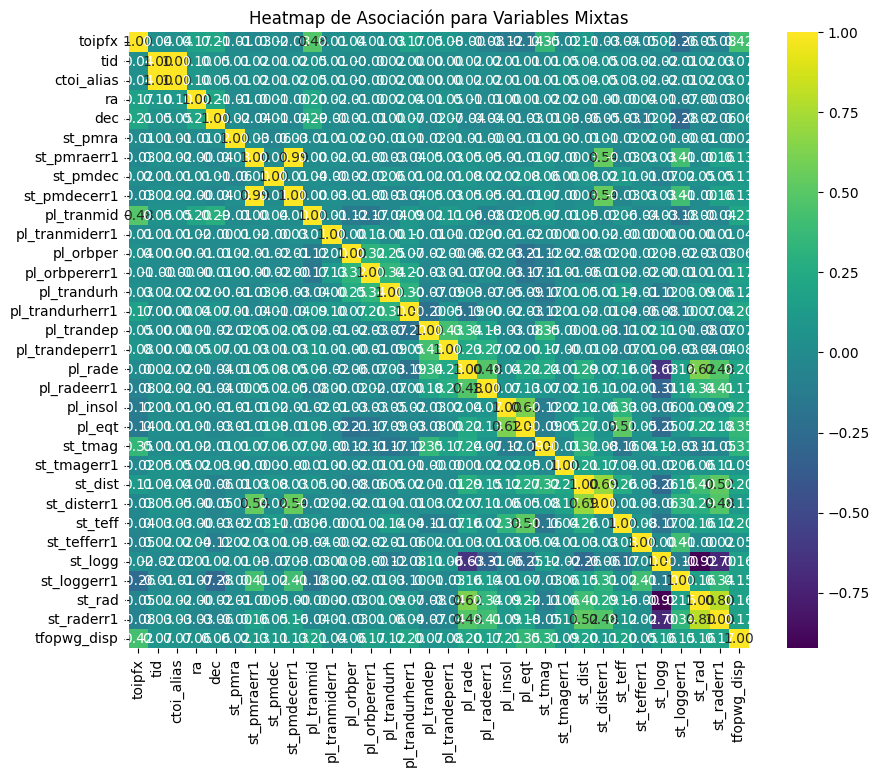

In [27]:
def cramers_v(x, y):
    """ Calcula la V de Cramer para dos variables categóricas. """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

def correlation_ratio(categories, measurements):
    """ Calcula el Ratio de Correlación para una variable categórica y una numérica. """
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.where(fcat == i)[0]]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

# --- Creación de la Matriz de Asociación ---

# Identificar columnas numéricas y categóricas
numerical_cols = final_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = final_df.select_dtypes(include='object').columns.tolist()

# Iniciar una matriz vacía
assoc_matrix = pd.DataFrame(index=final_df.columns, columns=final_df.columns)

# Calcular la asociación para cada par de columnas
for col1 in final_df.columns:
    for col2 in final_df.columns:
        if col1 == col2:
            assoc_matrix.loc[col1, col2] = 1.0
            continue

        if col1 in numerical_cols and col2 in numerical_cols:
            # Numérica vs Numérica (Pearson)
            corr = final_df[col1].corr(final_df[col2])
            assoc_matrix.loc[col1, col2] = corr
        elif col1 in categorical_cols and col2 in categorical_cols:
            # Categórica vs Categórica (Cramer's V)
            assoc = cramers_v(final_df[col1], final_df[col2])
            assoc_matrix.loc[col1, col2] = assoc
            assoc_matrix.loc[col2, col1] = assoc # Es simétrica
        else:
            # Numérica vs Categórica (Correlation Ratio)
            if col1 in categorical_cols: # Asegurarse que el primer argumento es categórico
                cat_col, num_col = col1, col2
            else:
                cat_col, num_col = col2, col1
            assoc = correlation_ratio(final_df[cat_col], final_df[num_col])
            assoc_matrix.loc[col1, col2] = assoc
            assoc_matrix.loc[col2, col1] = assoc # Es simétrica

# Convertir la matriz a tipo de dato numérico
assoc_matrix = assoc_matrix.astype(float)

# --- Visualización del Heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(assoc_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title('Heatmap de Asociación para Variables Mixtas')
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

X = final_df.drop('tfopwg_disp', axis=1)
y = final_df['tfopwg_disp']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1,
                                                    stratify = y)

In [34]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train_std = (sc.transform(X_train))
X_test_std = (sc.transform(X_test))

In [56]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=50,
                                criterion='gini',
                                max_features='sqrt',
                                max_depth=20)

forest.fit(X_train_std, y_train)

print('Train Accuracy : %.5f' % forest.score(X_train_std, y_train))
print('Test Accuracy : %.5f' % forest.score(X_test_std, y_test))

Train Accuracy : 0.98468
Test Accuracy : 0.73077


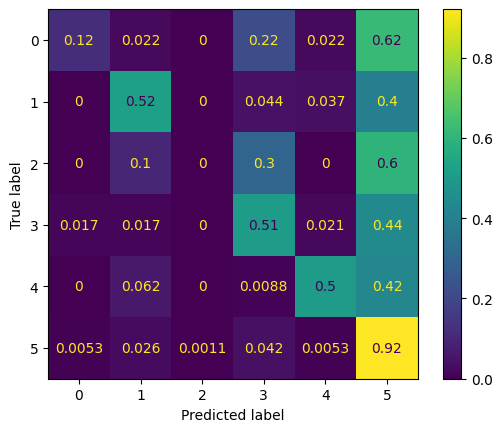

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = forest.predict(X_test_std)
cm = confusion_matrix(y_test, y_pred, normalize='true')

cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()